In [24]:
import tensorflow as tf
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [3]:
tf.__version__

'2.1.0'

In [4]:
adata = sc.read('dataA_dataB_17808_1000_scaled_minax_umap')

In [5]:
adata

AnnData object with n_obs × n_vars = 17808 × 1000 
    obs: 'Details', 'Sample_name', 'batch', 'doublet_scores', 'library', 'n_counts'
    uns: 'neighbors'
    obsm: 'X_minmax_latent', 'X_pca', 'X_scaled_latent', 'X_umap'

In [6]:
latent_rep= adata.obsm['X_minmax_latent']

In [7]:
input_shape=latent_rep.shape[1]
input_shape

16

In [8]:
diffusion_dim = adata.obsm['X_umap']
diffusion_dim.shape

(17808, 2)

### setting aside a test set for the end

In [10]:
latent_train, latent_test, umap_train, umap_test = train_test_split(latent_rep, diffusion_dim, test_size=0.2, random_state=42, shuffle=True)

In [11]:
print(latent_train.shape, latent_test.shape)

(14246, 16) (3562, 16)


In [12]:
print(umap_train.shape, umap_test.shape)

(14246, 2) (3562, 2)


### defining the model

In [16]:
model = tf.keras.Sequential([
layers.Dense(64, activation='sigmoid', input_shape=[input_shape]),
layers.Dropout(0.2),
layers.Dense(64, activation='sigmoid'),
layers.Dropout(0.2),
layers.Dense(2)
])

optimizer = tf.keras.optimizers.Adam()
# loss_object = tf.keras.losses.MeanSquaredError()

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 5,378
Trainable params: 5,378
Non-trainable params: 0
_________________________________________________________________


### defining a few things for training

In [18]:
EPOCHS = 10000

In [19]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

### trying to train now

In [21]:
history = model.fit(latent_train, umap_train,
                    epochs=EPOCHS, validation_split = 0.2, verbose=1,
                    shuffle=True , batch_size=32, 
                    callbacks=[early_stop, 
#                                tfdocs.modeling.EpochDots(),
                               tf.keras.callbacks.TensorBoard(log_dir='./logs')])

Train on 11396 samples, validate on 2850 samples
Epoch 1/10000
11396/11396 [==============================] - 1s 100us/sample - loss: 39.3534 - mae: 5.1498 - mse: 39.3534 - val_loss: 37.9533 - val_mae: 5.0543 - val_mse: 37.9533
Epoch 2/10000
11396/11396 [==============================] - 1s 56us/sample - loss: 37.0543 - mae: 5.0047 - mse: 37.0543 - val_loss: 32.7154 - val_mae: 4.7163 - val_mse: 32.7154
Epoch 3/10000
11396/11396 [==============================] - 1s 56us/sample - loss: 28.3441 - mae: 4.3782 - mse: 28.3441 - val_loss: 21.1705 - val_mae: 3.7840 - val_mse: 21.1705
Epoch 4/10000
11396/11396 [==============================] - 1s 57us/sample - loss: 20.9732 - mae: 3.6935 - mse: 20.9732 - val_loss: 15.9275 - val_mae: 3.2078 - val_mse: 15.9275
Epoch 5/10000
11396/11396 [==============================] - 1s 57us/sample - loss: 18.3785 - mae: 3.3940 - mse: 18.3785 - val_loss: 14.4687 - val_mae: 3.0017 - val_mse: 14.4687
Epoch 6/10000
11396/11396 [==============================] -

11396/11396 [==============================] - 1s 54us/sample - loss: 10.4486 - mae: 2.4788 - mse: 10.4486 - val_loss: 8.7644 - val_mae: 2.2466 - val_mse: 8.7644
Epoch 93/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 10.3942 - mae: 2.4655 - mse: 10.3942 - val_loss: 8.7176 - val_mae: 2.2328 - val_mse: 8.7176
Epoch 94/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 10.4379 - mae: 2.4754 - mse: 10.4379 - val_loss: 8.6607 - val_mae: 2.2236 - val_mse: 8.6607
Epoch 95/10000
11396/11396 [==============================] - 1s 59us/sample - loss: 10.3791 - mae: 2.4629 - mse: 10.3791 - val_loss: 8.6931 - val_mae: 2.2310 - val_mse: 8.6931
Epoch 96/10000
11396/11396 [==============================] - 1s 59us/sample - loss: 10.3043 - mae: 2.4504 - mse: 10.3043 - val_loss: 8.6634 - val_mae: 2.2247 - val_mse: 8.6634
Epoch 97/10000
11396/11396 [==============================] - 1s 59us/sample - loss: 10.4063 - mae: 2.4670 - mse: 10.4063 - val_lo

11396/11396 [==============================] - 1s 58us/sample - loss: 9.0569 - mae: 2.2778 - mse: 9.0569 - val_loss: 7.4581 - val_mae: 2.0418 - val_mse: 7.4581
Epoch 185/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 9.1615 - mae: 2.2929 - mse: 9.1615 - val_loss: 7.4409 - val_mae: 2.0322 - val_mse: 7.4409
Epoch 186/10000
11396/11396 [==============================] - 1s 59us/sample - loss: 9.1080 - mae: 2.2788 - mse: 9.1080 - val_loss: 7.5304 - val_mae: 2.0551 - val_mse: 7.5304
Epoch 187/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 9.0771 - mae: 2.2742 - mse: 9.0771 - val_loss: 7.4624 - val_mae: 2.0420 - val_mse: 7.4624
Epoch 188/10000
11396/11396 [==============================] - 1s 56us/sample - loss: 9.0108 - mae: 2.2735 - mse: 9.0108 - val_loss: 7.4772 - val_mae: 2.0459 - val_mse: 7.4772
Epoch 189/10000
11396/11396 [==============================] - 1s 57us/sample - loss: 9.0200 - mae: 2.2770 - mse: 9.0200 - val_loss: 7.4

11396/11396 [==============================] - 1s 60us/sample - loss: 8.3921 - mae: 2.1819 - mse: 8.3921 - val_loss: 6.8654 - val_mae: 1.9496 - val_mse: 6.8654
Epoch 277/10000
11396/11396 [==============================] - 1s 60us/sample - loss: 8.4744 - mae: 2.1897 - mse: 8.4744 - val_loss: 6.8122 - val_mae: 1.9410 - val_mse: 6.8122
Epoch 278/10000
11396/11396 [==============================] - 1s 60us/sample - loss: 8.3647 - mae: 2.1836 - mse: 8.3647 - val_loss: 6.8249 - val_mae: 1.9427 - val_mse: 6.8249
Epoch 279/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 8.3607 - mae: 2.1741 - mse: 8.3607 - val_loss: 6.8317 - val_mae: 1.9474 - val_mse: 6.8317
Epoch 280/10000
11396/11396 [==============================] - 1s 59us/sample - loss: 8.3291 - mae: 2.1752 - mse: 8.3291 - val_loss: 6.7891 - val_mae: 1.9377 - val_mse: 6.7891
Epoch 281/10000
11396/11396 [==============================] - 1s 60us/sample - loss: 8.4452 - mae: 2.1862 - mse: 8.4452 - val_loss: 6.7

11396/11396 [==============================] - 1s 60us/sample - loss: 7.9844 - mae: 2.1162 - mse: 7.9844 - val_loss: 6.4125 - val_mae: 1.8710 - val_mse: 6.4125
Epoch 369/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 7.9371 - mae: 2.1168 - mse: 7.9371 - val_loss: 6.4308 - val_mae: 1.8763 - val_mse: 6.4308
Epoch 370/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 7.9133 - mae: 2.1065 - mse: 7.9133 - val_loss: 6.4758 - val_mae: 1.8824 - val_mse: 6.4758
Epoch 371/10000
11396/11396 [==============================] - 1s 56us/sample - loss: 7.8919 - mae: 2.1021 - mse: 7.8919 - val_loss: 6.4234 - val_mae: 1.8756 - val_mse: 6.4234
Epoch 372/10000
11396/11396 [==============================] - 1s 58us/sample - loss: 7.9283 - mae: 2.1094 - mse: 7.9283 - val_loss: 6.4402 - val_mae: 1.8759 - val_mse: 6.4402
Epoch 373/10000
11396/11396 [==============================] - 1s 57us/sample - loss: 7.8605 - mae: 2.1041 - mse: 7.8605 - val_loss: 6.3

### Evaluate the model on the test data using `evaluate`

In [22]:
print('\n# Evaluate on test data')
results = model.evaluate(latent_test, umap_test, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
3562/3562 [==============================] - 0s 25us/sample - loss: 6.6298 - mae: 1.9102 - mse: 6.6298
test loss, test acc: [6.6298391362511, 1.9102075, 6.629839]


In [31]:
model.metrics_names

['loss', 'mae', 'mse']

In [30]:
results

[6.6298391362511, 1.9102075, 6.629839]

### checking things with plot

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
379,7.985789,2.118180,7.985789,6.375247,1.868339,6.375247,379
380,7.905784,2.108219,7.905784,6.370762,1.863439,6.370761,380
381,7.955644,2.114063,7.955644,6.369701,1.864859,6.369701,381
382,7.924952,2.107085,7.924950,6.403629,1.872157,6.403629,382
383,7.962564,2.118057,7.962567,6.373984,1.865158,6.373984,383


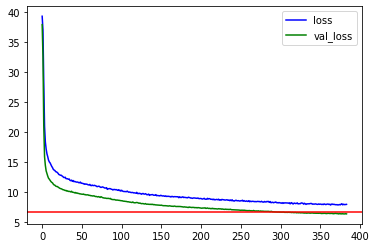

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(hist['epoch'],hist['loss'],c='b',label='loss')
ax.plot(hist['epoch'],hist['val_loss'],c='g',label='val_loss')
plt.axhline(y=results[0], color='r', linestyle='-')
plt.legend(loc='best')
plt.show()

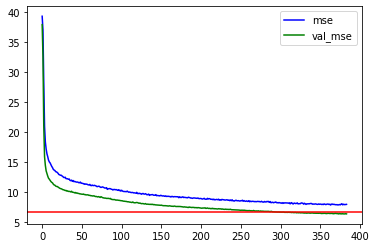

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(hist['epoch'],hist['mse'],c='b',label='mse')
ax.plot(hist['epoch'],hist['val_mse'],c='g',label='val_mse')
plt.axhline(y=results[2], color='r', linestyle='-')
plt.legend(loc='best')
plt.show()

### saving the model

In [46]:
# Save entire model to a HDF5 file
model.save('trial_1_training_tensorflow')

# Recreate the exact same model, including weights and optimizer.
# model = tf.keras.models.load_model('my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: trial_1_training_tensorflow_3Apr2020/assets


### trying to predict things now

In [35]:
dataB = sc.read('dataB_192_1000_scaled_minax_umap')

In [36]:
dataB

AnnData object with n_obs × n_vars = 192 × 1000 
    obs: 'Details', 'Sample_name', 'batch', 'doublet_scores', 'library', 'n_counts'
    uns: 'neighbors'
    obsm: 'X_minmax_latent', 'X_pca', 'X_scaled_latent'

In [37]:
dataB_minmax_latent = dataB.obsm['X_minmax_latent']
dataB_minmax_latent.shape

(192, 16)

In [38]:
dataB_predicted_umap = model.predict(dataB_minmax_latent)

In [39]:
dataB_predicted_umap.shape

(192, 2)

In [42]:
type(dataB_predicted_umap)

numpy.ndarray

In [43]:
np.save('dataB_predicted_umap.npy', dataB_predicted_umap) 

### predicting the original latent from dataA used for training and see how it deviate from the original

In [40]:
dataA_predicted_umap = model.predict(latent_rep)

In [41]:
dataA_predicted_umap.shape

(17808, 2)

In [44]:
type(dataA_predicted_umap)

numpy.ndarray

In [45]:
np.save( 'dataA_predicted_umap.npy',dataA_predicted_umap)